In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

C:\Users\karth\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
train_df=pd.read_csv("Walmart_Store_sales.csv")
train_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
train_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
train_df.shape

(6435, 8)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
train_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
train_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
train_df[train_df['Weekly_Sales']==max(train_df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [9]:
train_df['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [10]:
st=[]
for i in range(1,45):
    df=train_df[train_df['Store']==i]['Weekly_Sales'].values
    st.append(np.std(df))

In [11]:
print('We can see that the maximum standard deviation was in store :', st.index(max(st))+1)

We can see that the maximum standard deviation was in store : 14


In [12]:
standardDeviationInSales=np.std(train_df['Weekly_Sales']);
print(standardDeviationInSales)

564322.7690195541


In [13]:
train_df['Weekly_Sales'].dtype

dtype('float64')

In [14]:
train_df['Weekly_Sales']=train_df['Weekly_Sales'].astype(int)
print(train_df)

#df['A'] = df['A'].astype(int)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010       1643690             0        42.31       2.572   
1         1  12-02-2010       1641957             1        38.51       2.548   
2         1  19-02-2010       1611968             0        39.93       2.514   
3         1  26-02-2010       1409727             0        46.63       2.561   
4         1  05-03-2010       1554806             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012        713173             0        64.88       3.997   
6431     45  05-10-2012        733455             0        64.89       3.985   
6432     45  12-10-2012        734464             0        54.47       4.000   
6433     45  19-10-2012        718125             0        56.47       3.969   
6434     45  26-10-2012        760281             0        58.85       3.882   

             CPI  Unemployment  
0     

In [15]:
train_df['CPI']=train_df['CPI'].astype(int)
train_df['Temperature']=train_df['Temperature'].astype(int)
train_df['Fuel_Price']=train_df['Fuel_Price'].astype(int)
train_df['Unemployment']=train_df['Unemployment'].astype(int)

print(train_df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010       1643690             0           42           2   
1         1  12-02-2010       1641957             1           38           2   
2         1  19-02-2010       1611968             0           39           2   
3         1  26-02-2010       1409727             0           46           2   
4         1  05-03-2010       1554806             0           46           2   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012        713173             0           64           3   
6431     45  05-10-2012        733455             0           64           3   
6432     45  12-10-2012        734464             0           54           4   
6433     45  19-10-2012        718125             0           56           3   
6434     45  26-10-2012        760281             0           58           3   

      CPI  Unemployment  
0     211    

In [16]:
train_df['Weekly_Sales']

0       1643690
1       1641957
2       1611968
3       1409727
4       1554806
         ...   
6430     713173
6431     733455
6432     734464
6433     718125
6434     760281
Name: Weekly_Sales, Length: 6435, dtype: int32

In [17]:
st=[]
for i in range(1,46):
    df=train_df[train_df['Store']==i]['Weekly_Sales'].values
    st.append(np.std(df))

In [18]:
print('We can see that the maximum standard deviation was in store :', st.index(max(st))+1)

We can see that the maximum standard deviation was in store : 14


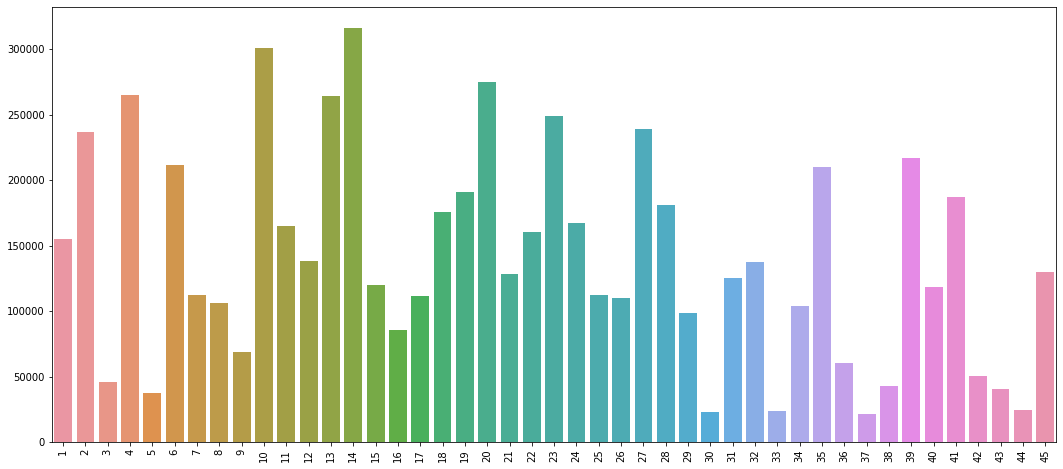

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(x=[i for i in range(1,46)],y=st)
plt.xticks(rotation=90)
plt.show()

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         6435 non-null   int64 
 1   Date          6435 non-null   object
 2   Weekly_Sales  6435 non-null   int32 
 3   Holiday_Flag  6435 non-null   int64 
 4   Temperature   6435 non-null   int32 
 5   Fuel_Price    6435 non-null   int32 
 6   CPI           6435 non-null   int32 
 7   Unemployment  6435 non-null   int32 
dtypes: int32(5), int64(2), object(1)
memory usage: 276.6+ KB


In [21]:
train_df.duplicated().sum()

0

In [22]:
train_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [23]:
#changing the data type of the ‘Date’ column because it is an object type
from datetime import datetime
type(train_df.Date[0])

str

In [24]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format='mixed', dayfirst=True)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int32         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   int32         
 5   Fuel_Price    6435 non-null   int32         
 6   CPI           6435 non-null   int32         
 7   Unemployment  6435 non-null   int32         
dtypes: datetime64[ns](1), int32(5), int64(2)
memory usage: 276.6 KB


In [26]:
#Which store has maximum sales?
total_sales=train_df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [27]:
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397719


In [28]:
#Which store has maximum standard deviation i.e., the sales vary a lot. 
#Also, find out the coefficient of mean to standard deviation
df_std=train_df.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)

In [29]:
pd.DataFrame(df_std).head()

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0


In [30]:
#Store which has maximum Standard Deviation
pd.DataFrame(df_std).head(1)

,Weekly_Sales
Store,
14,317570.0


In [31]:
#Coefficient of mean to standard deviation
store14=train_df[train_df.Store==14].Weekly_Sales

In [32]:
mean_to_stddev=store14.std()/store14.mean()*100
print(mean_to_stddev,'%')

15.71367634391625 %


In [33]:
#Which store/s has a good quarterly growth rate in Q3’2012?
q2_sales=train_df[(train_df['Date']>='2012-04-01')&(train_df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [34]:
q3_sales=train_df[(train_df['Date']>='2012-07-01')&(train_df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [35]:
#Growth rate = ((present-past)/past)*100
df_2012=pd.DataFrame({'Q2 Sales':q2_sales, 'Q3 Sales':q3_sales,'Difference':(q3_sales-q2_sales), 'Growth Rate %':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by='Growth Rate %', ascending=False).head()
df_2012

,Q2 Sales,Q3 Sales,Difference,Growth Rate %
Store,,,,
7,7290853,8262781,971928,13.330786
16,6564330,7121535,557205,8.488376
35,10838308,11322413,484105,4.466610
26,13155330,13675686,520356,3.955477
39,20214121,20715108,500987,2.478401


In [36]:
max_sales_2012Q3=df_2012.groupby('Store')['Growth Rate %'].sum()
max_sales_2012Q3.idxmax()

7

No store has shown quarterly growth rate in Q3'2012, although store 7 has maximum growth rate as compared to others

In [37]:
#Some holidays have a negative impact on sales.Find out holidays that have higher
#sales than the mean sales in the non-holiday season for all stores together.

We have 4 Holiday Events, 
(1) Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13, 
(2) Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13, 
(3) Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13, 
(4) Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13.

In [38]:
#Calculating the holiday event sales of each of the events and then find the non-holiday sales.

In [39]:
#Holiday events
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [40]:
Super_Bowl_Sales=round(train_df[train_df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_Sales=round(train_df[train_df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_Sales=round(train_df[train_df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_Sales=round(train_df[train_df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [41]:
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(nan, 1042426.79, 1471272.92, 960832.68)

In [42]:
non_holiday_sales=round(train_df[train_df['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)
non_holiday_sales

1041255.89

In [43]:
pd.DataFrame([{'Super_Bowl_Sales':Super_Bowl_Sales,'Labour_Day_Sales':Labour_Day_Sales,'Thanksgiving_Sales':Thanksgiving_Sales,'Christmas_Sales':Christmas_Sales,'non_holiday_sales':non_holiday_sales}]).T

,0
Super_Bowl_Sales,NaN
Labour_Day_Sales,1042426.79
Thanksgiving_Sales,1471272.92
Christmas_Sales,960832.68
non_holiday_sales,1041255.89


Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38)

In [44]:
#Provide a monthly and semester view of sales in units and give insights.

Plotting a month-wise bar graph for weekly sales to get an idea about which month has the maximum sales, then will plot the semester-wise bar graph for weekly sales to get some insights about the semester's weekly sales.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['day'] = train_df['Date'].dt.day

#Monthwise Sales

Text(0.5, 1.0, 'Monthwise Sales')

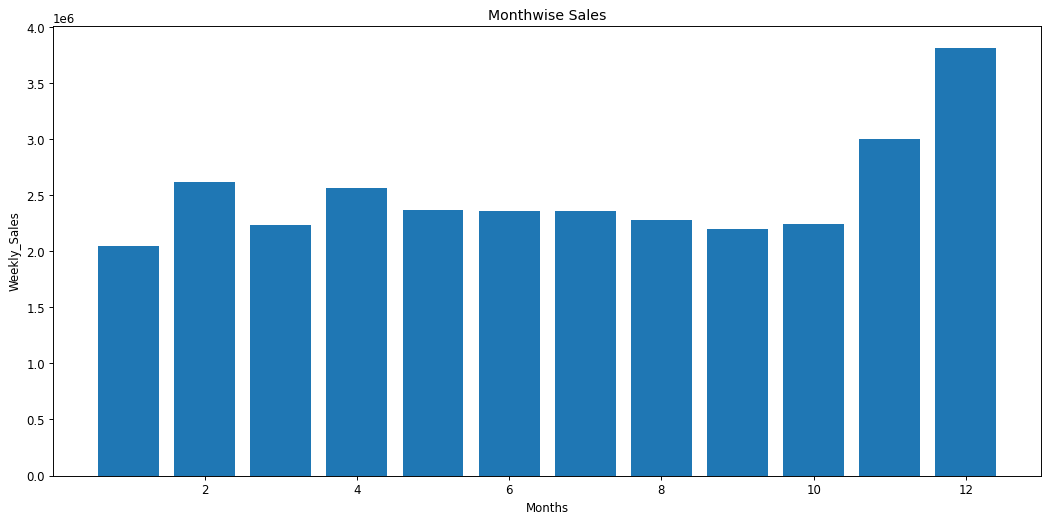

In [48]:
plt.figure(figsize=(15,7), dpi=85)
plt.bar(train_df['month'],train_df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

In [49]:
#Semesterwise Sales
train_df['semester']=np.where(train_df['month']<7,1,2)
train_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-02-05,1643690,0,42,2,211,8,2010,2,5,1
1,1,2010-02-12,1641957,1,38,2,211,8,2010,2,12,1
2,1,2010-02-19,1611968,0,39,2,211,8,2010,2,19,1
3,1,2010-02-26,1409727,0,46,2,211,8,2010,2,26,1
4,1,2010-03-05,1554806,0,46,2,211,8,2010,3,5,1


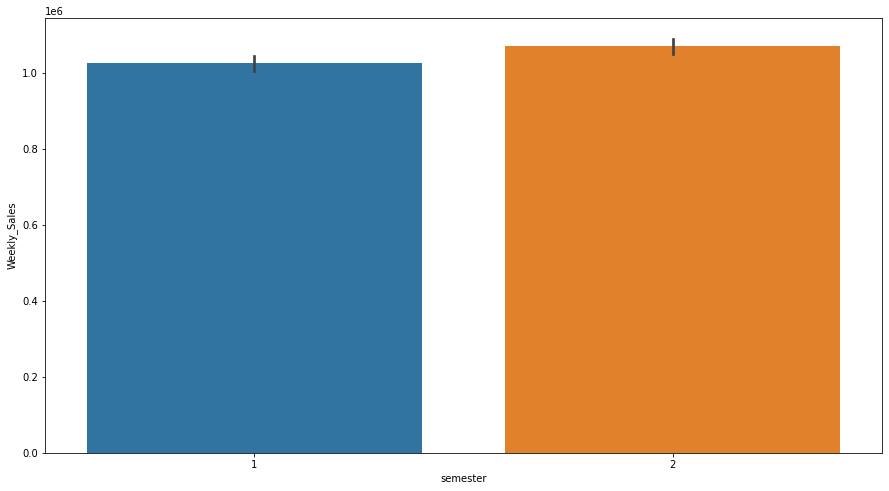

In [50]:
plt.figure(figsize=(15,8))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=train_df)

Insights drawn-(1)December month has the highest weekly sales. (2) Semester 2 has the highest weekly sales.

Model Building- First, define dependent and independent variables. Here, store, fuel price, CPI, unemployment, day, month, and year are the independent variables and weekly sales is the dependent variable. Now, it’s time to train the model. Import train_test_spit from sklearn.model_selection and train 80% of the data and test on the rest 20% of the data.

In [51]:
#Define independent and dependent variable
#Select features and target 
x=train_df[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y=train_df['Weekly_Sales']

In [79]:
!pip install scikit-learn

In [82]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [84]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.3463712e+18 1.3372992e+18 1.2895200e+18 ... 1.3397184e+18 1.3409280e+18
 1.2725856e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int32         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   int32         
 5   Fuel_Price    6435 non-null   int32         
 6   CPI           6435 non-null   int32         
 7   Unemployment  6435 non-null   int32         
 8   year          6435 non-null   int32         
 9   month         6435 non-null   int32         
 10  day           6435 non-null   object        
 11  semester      6435 non-null   int32         
dtypes: datetime64[ns](1), int32(8), int64(2), object(1)
memory usage: 402.3+ KB


In [89]:
train_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-02-05,1643690,0,42,2,211,8,2010,2,Friday,1
1,1,2010-02-12,1641957,1,38,2,211,8,2010,2,Friday,1
2,1,2010-02-19,1611968,0,39,2,211,8,2010,2,Friday,1
3,1,2010-02-26,1409727,0,46,2,211,8,2010,2,Friday,1
4,1,2010-03-05,1554806,0,46,2,211,8,2010,3,Friday,1


In [90]:
train_df['day']=train_df['day'].astype(str)
print(train_df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05       1643690             0           42           2   
1         1 2010-02-12       1641957             1           38           2   
2         1 2010-02-19       1611968             0           39           2   
3         1 2010-02-26       1409727             0           46           2   
4         1 2010-03-05       1554806             0           46           2   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28        713173             0           64           3   
6431     45 2012-10-05        733455             0           64           3   
6432     45 2012-10-12        734464             0           54           4   
6433     45 2012-10-19        718125             0           56           3   
6434     45 2012-10-26        760281             0           58           3   

      CPI  Unemployment  year  month     day  semes

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  # Assuming you'll use metrics for evaluation

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [95]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Linear Regression:



NameError: name 'LinearRegression' is not defined

In [60]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr=RandomForestRegressor(n_estimators=400,max_depth=15,n_jpbs=5)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy: ', rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(y_pred, y_test)

Random Forest Regressor:



NameError: name 'RandomForestRegressor' is not defined

Here, we have used 2 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives an accuracy of almost 89%. so, it is the best model to forecast weekly sales.

In [69]:
#Change dates into days by creating new variable.

train_df['day']=pd.to_datetime(train_df['Date']).dt.day_name()
train_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-02-05,1643690,0,42,2,211,8,2010,2,Friday,1
1,1,2010-02-12,1641957,1,38,2,211,8,2010,2,Friday,1
2,1,2010-02-19,1611968,0,39,2,211,8,2010,2,Friday,1
3,1,2010-02-26,1409727,0,46,2,211,8,2010,2,Friday,1
4,1,2010-03-05,1554806,0,46,2,211,8,2010,3,Friday,1


In [70]:
experiment_day_start=5
train_df['Date']=pd.to_datetime(train_df['Date'], dayfirst=True)
train_df['exp_day']=(train_df['Date']-train_df['Date'].min()).train_days+experiment_day_start

AttributeError: 'Series' object has no attribute 'train_days'

In [67]:
train_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-02-05,1643690,0,42,2,211,8,2010,2,5,1
1,1,2010-02-12,1641957,1,38,2,211,8,2010,2,12,1
2,1,2010-02-19,1611968,0,39,2,211,8,2010,2,19,1
3,1,2010-02-26,1409727,0,46,2,211,8,2010,2,26,1
4,1,2010-03-05,1554806,0,46,2,211,8,2010,3,5,1


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int32         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   int32         
 5   Fuel_Price    6435 non-null   int32         
 6   CPI           6435 non-null   int32         
 7   Unemployment  6435 non-null   int32         
 8   year          6435 non-null   int32         
 9   month         6435 non-null   int32         
 10  day           6435 non-null   object        
 11  semester      6435 non-null   int32         
dtypes: datetime64[ns](1), int32(8), int64(2), object(1)
memory usage: 402.3+ KB


In [71]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = train_df['Unemployment']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

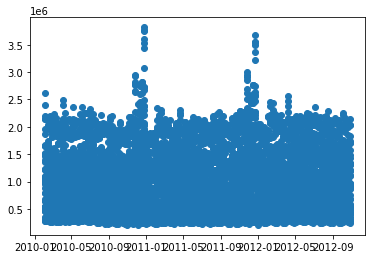

NameError: name 'stats' is not defined

In [72]:
# Weekly_Sales vs exp_day
x = train_df['Date']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

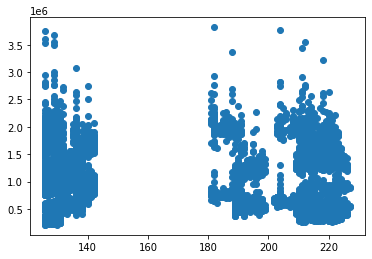

NameError: name 'stats' is not defined

In [64]:
#Weekly sales vs CPI
x = train_df['CPI']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

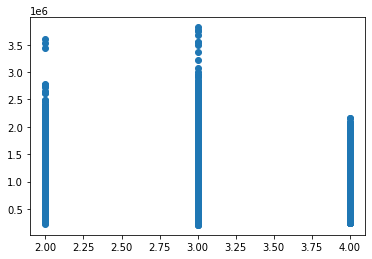

NameError: name 'stats' is not defined

In [63]:
#Weekly sales vs Fuel price
x = train_df['Fuel_Price']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

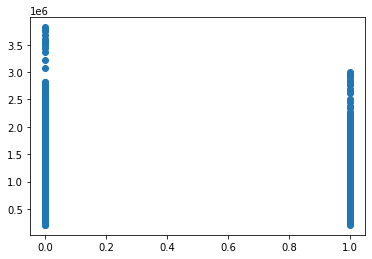

NameError: name 'stats' is not defined

In [62]:
#Weekly sales vs Holidays
x = train_df['Holiday_Flag']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

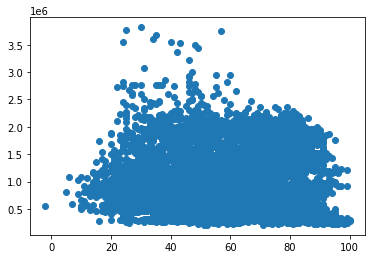

NameError: name 'stats' is not defined

In [61]:
#Weekly sales vs Temperature
x = train_df['Temperature']
y = train_df['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()